In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import spacy_stanza
import stanza

stanza.download("fr")
nlp = spacy_stanza.load_pipeline("fr")


/home/tacitus/anaconda3/envs/stageM1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-22 14:42:40 INFO: Downloading default packages for language: fr (French) ...
2024-07-22 14:42:43 INFO: File exists: /home/tacitus/stanza_resources/fr/default.zip
2024-07-22 14:42:56 INFO: Finished downloading models and saved to /home/tacitus/stanza_resources.
2024-07-22 14:43:01 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-07-22 14:43:04 INFO: Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| 

In [2]:
#Ouvrir le fichier contenant uniquement le tableau des émotions montrees (groupe pas en token)
dataM = pd.read_csv("montree_SitEmo_lemma.csv")
print(len(dataM))

colonnes = dataM[["Corpus","Id_aa","Nom_aa","Id_phrase","Texte_phrase","Id_SitEmo","Auteur_SitEmo","Texte_SitEmo","Nature_SitEmo","Declencheur_entier","Mode","Type1","Type2","Cat1","Cat2","Lemmes_declencheurs","Lemmes_SitEmo"]]
#(545)


545


In [3]:
# liste des natures
list_natures = dataM["Nature_SitEmo"].drop_duplicates().to_list()
print(f"Voilà la liste des natures des SitEmo : {list_natures}")

Voilà la liste des natures des SitEmo : ['SAdv', 'Proposition', 'SN', 'SAdj', 'Conj. de coordination', 'Accumulation', 'Interjection', 'SPrep', 'Enonce exclamatif', 'Autre', 'Conj. de subordination', 'Enonce averbal', 'Dislocation gauche', 'Enonce clive', 'Dislocation droite']


In [4]:
#compter les occurences de chaque nature
nature_counts = dataM['Nature_SitEmo'].value_counts()
nature_counts

Nature_SitEmo
Proposition               203
SAdv                      143
Interjection               70
SN                         41
SPrep                      15
Enonce averbal             14
SAdj                       13
Autre                      11
Accumulation               10
Dislocation gauche          6
Conj. de coordination       4
Conj. de subordination      4
Enonce exclamatif           4
Enonce clive                4
Dislocation droite          3
Name: count, dtype: int64

In [41]:
#Créer un fichier tsv pour chaque nature d'emotion

for nature in list_natures: 
    data_nature = dataM.query("`Nature_SitEmo` == @nature")
    data_nature.to_csv(f"./natures/{nature}_emoMontree.tsv",sep="\t", index=False)

/tmp/ipykernel_10432/3750776244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nature_counts.index, y=nature_counts.values, palette='plasma')


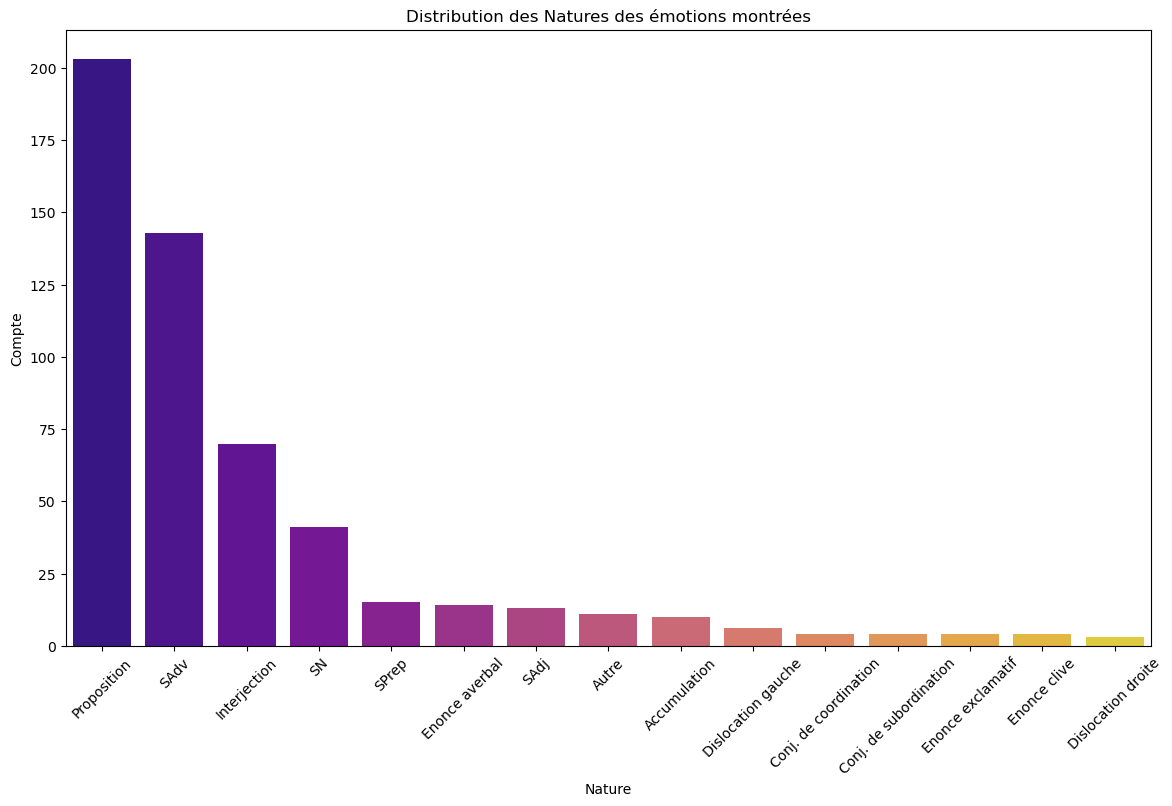

In [5]:
# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=nature_counts.index, y=nature_counts.values, palette='plasma')
plt.title('Distribution des Natures des émotions montrées')
plt.xlabel('Nature')
plt.ylabel('Compte')
plt.xticks(rotation=45)
plt.show()

# Rajouter des colonnes pour la présence de potentiels marqueurs 


In [6]:
#Rajouter des colonnes pour la présence de potentiels marqueurs 

# Savoir si il y a un !
def exclamation(text):
    return 1 if '!' in text else 0
# Savoir si il y a un ?
def interrogation(text):
    return 1 if '?' in text else 0

# Recherche au niveau du SitEmo et au niveau de la phrase 
dataM['exclamation']=dataM['Texte_SitEmo'].apply(exclamation)
dataM['exclamation_phrase']=dataM['Texte_phrase'].apply(exclamation)

dataM['interrogation']=dataM['Texte_SitEmo'].apply(interrogation)
dataM['interrogation_phrase']=dataM['Texte_phrase'].apply(interrogation)


dataM

,Corpus,Id_aa,Nom_aa,Id_phrase,Texte_phrase,Id_SitEmo,Auteur_SitEmo,Texte_SitEmo,Nature_SitEmo,Declencheur_entier,...,Type1,Type2,Cat1,Cat2,Lemmes_declencheurs,Lemmes_SitEmo,exclamation,exclamation_phrase,interrogation,interrogation_phrase
0,Albert,3120-0,Albert10-guerre_double_peine_enfants,3120-0_2367-2459,Il arrive même que certains d’entre eux se ret...,doltean_1615466958684_3120-0,doltean,même,SAdv,même,...,Base,Aucun,Tristesse,Aucune,même,même,0,0,0,0
1,Albert,587-83561643,Albert11_Voleur_du_dimanche,587-83561643_19-206,On pourrait croire qu’il s’agit d’un film comi...,doltean_1621943477089_587-83561643,doltean,On pourrait croire qu’il s’agit d’un film comique,Proposition,On pourrait croire qu'il s'agit d'un film comique,...,Base,Aucun,Surprise,Aucune,on pouvoir croire que il se agir de un film co...,on pouvoir croire qu’ il s’ agir d’ un film co...,0,0,0,0
2,Albert,2807-0,Albert15_Pluton_planete_mal-aimee_des_astronomes,2807-0_1841-2156,"Toutefois, pour l’instant, leur proposition es...",doltean_1616424784922_2807-0,doltean,juste,SAdv,juste,...,Base,Aucun,Colere,Aucune,juste,juste,0,0,0,0
3,Albert,2807-0,Albert15_Pluton_planete_mal-aimee_des_astronomes,2807-0_1841-2156,"Toutefois, pour l’instant, leur proposition es...",doltean_1616082724076_2807-0,doltean,Il faut être assez désespéré,Proposition,désespéré,...,Base,Aucun,Colere,Aucune,désespérer,il falloir être assez désespérer,0,0,0,0
4,Albert,5579-0,Albert16_Le_festival_de_Cannes_celebre_sa_70e_...,5579-0_4215-4302,Il lui avait alors lancé : « si vous ne m’aime...,doltean_1615993152411_5579-0,doltean,"si vous ne m’aimez pas, je ne vous aime pas no...",Proposition,"si vous ne m’aimez pas, je ne vous aime pas no...",...,Base,Aucun,Colere,Aucune,"si vous ne m’ aimer pas , je ne vous aimer pas...","si vous ne m’ aimer pas , je ne vous aimer pas...",0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,WP7Fiction,1949-21897810,fiction_MaloDeLange_Murail,1949-21897810_1356-1395,"- Mais mes enfants, c’est autre chose.",aetienne_1620827605274_1949-21897810,aetienne,"mes enfants, c’est autre chose",Dislocation gauche,"mes enfants, c",...,Base,Aucun,Peur,Aucune,"mon enfant , c","mon enfant , c’ être autre chose",0,0,0,0
541,WP7Fiction,2253-99270072,fiction_Oeil-du-loup_Pennac,2253-99270072_127-151,"M'agace, celui-là...",aetienne_1630932933454_2253-99270072,aetienne,"M'agace, celui-là",Dislocation droite,"M'agace, celui-là",...,Base,Aucun,Colere,Aucune,"me agacer , celui -là","me agacer , celui -là",0,0,0,0
542,WP7Fiction,2253-99270072,fiction_Oeil-du-loup_Pennac,2253-99270072_1983-2031,"Il n'a pas passé la nuit ici, tout de même !",aetienne_1620827605331_2253-99270072,aetienne,tout de même,SAdv,tout de même,...,Base,Aucun,Surprise,Aucune,tout de même,tout de même,0,1,0,0
543,WP7Fiction,2260-0,fiction_Verte,2260-0_53-99,"Mais non, il a fallu qu'elle choisisse Verte.",aetienne_1630935159053_2260-0,aetienne,Mais non,Autre,Mais non,...,Base,Aucun,Colere,Aucune,mais non,mais non,0,0,0,0


In [8]:
# Créer une colonne pos_phrase list des pos des mots de la phrase

def pos(text): 
    doc = nlp(text)
    list_pos = [token.pos_ for token in doc]
    #pos = ' '.join(pos)
    #print(list_pos)
    return list_pos

dataM['pos_phrase']=dataM['Texte_phrase'].apply(pos)

/home/tacitus/anaconda3/envs/stageM1/lib/python3.12/site-packages/spacy/language.py:1037: UserWarning: Due to multiword token expansion or an alignment issue, the original text has been replaced by space-separated expanded tokens.
  doc = self._ensure_doc(text)
/home/tacitus/anaconda3/envs/stageM1/lib/python3.12/site-packages/spacy/language.py:1037: UserWarning: Can't set named entities because of multi-word token expansion or because the character offsets don't map to valid tokens produced by the Stanza tokenizer:
Words: ['On', 'pourrait', 'croire', 'qu’', 'il', 's’', 'agit', 'd’', 'un', 'film', 'comique', 'mais', 'les', 'images', 'sont', 'bien', 'réelles', ':', 'à', 'les', 'États-Unis', ',', 'une', 'caméra', 'de', 'sécurité', 'd’', 'un', 'supermarché', 'a', 'filmé', 'le', 'voleur', 'le', 'plus', 'maladroit', 'de', 'le', 'monde', '.']
Entities: [('États-Unis', 'LOC', 90, 100)]
  doc = self._ensure_doc(text)
/home/tacitus/anaconda3/envs/stageM1/lib/python3.12/site-packages/spacy/langua

In [9]:
def averbaux(pos): 
    return 0 if 'VERB' or 'AUX' not in pos else 1 

dataM['phrase_averbaux']=dataM['pos_phrase'].apply(averbaux)

In [14]:
def interjections(pos): 
    return 1 if 'INTJ' in pos else 0 

dataM['interjections']=dataM['pos_phrase'].apply(interjections)


In [15]:
#Créer un fichier tsv pour chaque nature d'emotion

for nature in list_natures: 
    data_nature = dataM.query("`Nature_SitEmo` == @nature")
    data_nature.to_csv(f"./natures2.0/{nature}_emoMontree.tsv",sep="\t", index=False)

In [16]:
dataM.to_csv("./NEW2_emoMontree.tsv",sep="\t", index=False)

In [ ]:
# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=nature_counts.index, y=nature_counts.values, palette='plasma')
plt.title('Distribution des Natures des émotions montrées')
plt.xlabel('Nature')
plt.ylabel('Compte')
plt.xticks(rotation=45)
plt.show()